## Sea Level

We have a datafile which contains the sea level in cm above NAP as a yearly average of 6 station on the Northsea coast of the Netherlands.

What can it tell us about the change (rise or fall) of the sea level.


Demonstration: 
    1. Linear Model
    2. Parameter fit

Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import PolynomialModel

from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

In [2]:
## Uncomment for plots in separate windows (macbook only)
#%matplotlib osx

Read the data

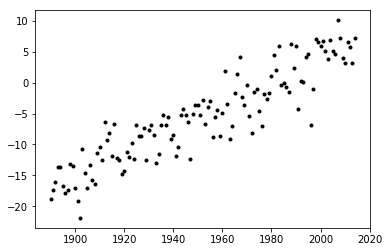

In [3]:
tbl = ascii.read( "data/zeespiegel.csv" )
year = tbl['col1'].data
level = tbl['col2'].data
plt.plot( year, level, 'k.' )
plt.show()


The level seems to rise linearly in time. We want to know how much.

We define a linear model (polynomial of order 1)

Polynomial: f( x:p ) = p_0 + p_1 * x


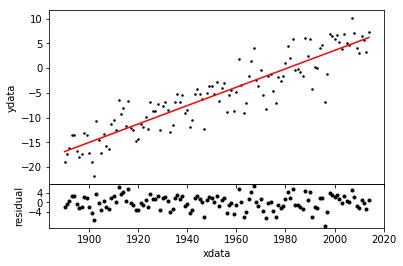

Parameters : [ -368.897    0.186]
StDevs     : [   14.738    0.008]


In [4]:
mdl = PolynomialModel( 1 )
print( mdl )

# define a fitter
fitter = Fitter( year, mdl )
 
# and fit the data, i.e. find the parameters of the model
param = fitter.fit( level, plot=True )

print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )


The rise of the sea level (2nd parameter) is somewhat less than 2 mm/year. If the level continues to rise by the same amount, the sea level in 2100 will be 82 * 0.186 = 15 cm higher than now.
The first parameter suggests that the sea level was about 4 meter lower at the year 0. Of course this is under the assumption that things have progressed in the same way as we see now. 

As things almost never continue to be the same as they are now, predictions for the future (and for the past) deteriorate in time.

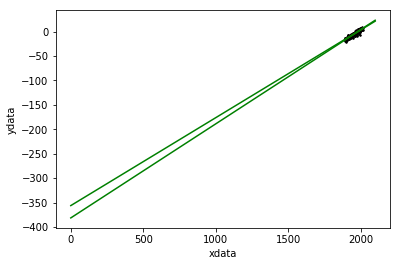

In [5]:
plotFit( year, level, model=mdl, show=False )
xx = numpy.arange( 2101, dtype=float )
yfit = mdl( xx )
err = fitter.monteCarloError( xdata=xx )
plt.plot( xx, yfit+err, 'g-' )
plt.plot( xx, yfit-err, 'g-' )
plt.show()